In [2]:
import logging

logger = logging.getLogger(__name__)
logger.setLevel(level=logging.INFO)
handler = logging.FileHandler("aaa.log")
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(levelname)s %(asctime)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)



In [35]:
from pymongo import MongoClient, ASCENDING, DESCENDING
import pytz
from datetime import datetime

logger.info('begin')
try:
    dbclient = MongoClient('busrv1.bud.zlzen.com', 27017, connectTimeoutMS=1000)
    # 调用server_info查询服务器状态，防止服务器异常并未连接成功
    dbclient.server_info()
except Exception as e:
    logger.exception('数据库连接失败')
    print('数据库连接失败')

dbname = 'vntrader_1day_db'
colname = 'WHR.USD.STK.SMART'
collection = dbclient[dbname][colname]
cursor = collection.find({
    'datetime': {
        '$gte': pytz.timezone('UTC').localize(datetime.strptime('19800101','%Y%m%d')),
        '$lte': pytz.timezone('UTC').localize(datetime.strptime('20180101','%Y%m%d')),
    }
}).sort('datetime', ASCENDING)


data_list = [['date', 'open', 'high', 'low', 'close', 'Volume']] +\
            [
                [
                    o['datetime'].strftime('%m/%d/%Y'),
                     str(o['open']), 
                     str(o['high']),
                     str(o['low']),
                     str(o['close']),
                     str(o['volume'])
                ] for o in cursor
            ]
print('前三个data_list=====', data_list[:3])



前三个data_list===== [['date', 'open', 'high', 'low', 'close', 'Volume'], ['03/17/1980', '15.63', '15.88', '15.5', '15.63', '337'], ['03/18/1980', '15.5', '15.5', '15.0', '15.5', '1913']]


前三个quotes===== [[722891.0, 15.63, 15.88, 15.5, 15.63], [722892.0, 15.5, 15.5, 15.0, 15.5], [722893.0, 15.63, 15.63, 15.5, 15.63]]


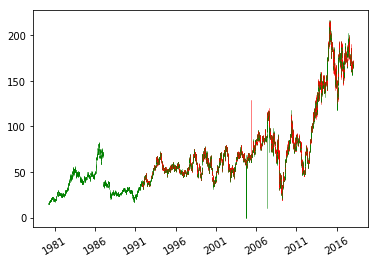

In [38]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mpd
import datetime
import mpl_finance as mpf


str2date =lambda x: mpd.date2num(datetime.datetime.strptime(x, '%m/%d/%Y').date())

# data_text = """
# date\topen\thigh\tlow\tclose\tVolume
# 1/4/2000\t1368.692993\t1407.517944\t1361.213989\t1406.370972\t0
# 1/5/2000\t1407.828979\t1433.780029\t1398.322998\t1409.682007\t0
# 1/6/2000\t1406.036011\t1463.954956\t1400.253052\t1463.942017\t0
# 1/7/2000\t1477.154053\t1522.824951\t1477.154053\t1516.604004\t0
# 1/8/2000\t1477.154053\t1522.824951\t1477.154053\t1516.604004\t0
# 1/9/2000\t1531.712036\t1546.723022\t1506.404053\t1545.112061\t0
# 1/10/2000\t1531.712036\t1546.723022\t1506.404053\t1545.112061\t0
# 1/11/2000\t1547.677979\t1547.708008\t1468.756958\t1479.781006\t0
# 1/12/2000\t1473.760986\t1489.280029\t1434.995972\t1438.02002\t0"""
# data_list = list(csv.reader(data_text.strip().splitlines(), delimiter='\t'))
columns = data_list[0]
quotes = [[str2date(d[0])] + [float(v) for v in d[1:-1]] for d in data_list[1:]]
date =  np.array([o[0] for o in quotes])
print('前三个quotes=====',quotes[:3])
ax1 = plt.gca()
mpf.candlestick_ohlc(ax1,quotes,width=0.4,colorup='g',colordown='r')
ax1.xaxis_date()
plt.setp(ax1.get_xticklabels(), rotation=30)
# ax1.plot([date[3]],[1500], 'ro')
ax1.autoscale_view()
